In [ ]:
!pip install matplotlib

In [1]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob

In [2]:
path = glob.glob("C:/Users/badia/Desktop/AI/Master 2/S3/ML/iitdelhi/*.bmp")

In [3]:

Data = []
for file in path:
    img = cv2.imread(file)
    Data.append(img)
    
Data = np.array(Data)

In [4]:
print('Data conntains',len(Data),'images')

Data conntains 493 images


In [5]:
print("the size of eatch image is ",Data[0].shape)

the size of eatch image is  (180, 50, 3)


In [6]:
#extract the names of the owners (participantes)
Names = []
for i in range (len(path)):
    Names.append((path[i])[50:53])
Names = np.array(Names)

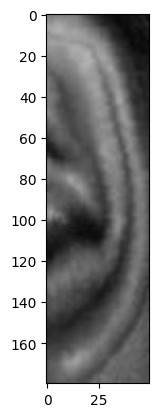

In [7]:
plt.imshow(Data[400])

Question 1: Classification using knn

In [8]:
#Convert images to 1 dimensional vector
Data_arr = []
for i in Data:
    Data_arr.append(i.reshape(-1))
    
Data_arr = np.array(Data_arr)
Data_arr.shape

(493, 27000)

In [9]:
#spliting the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Data_arr, Names, test_size=0.33, random_state=0, stratify=Names )  #to split the same time every run

In [10]:
X_train.shape

(330, 27000)

In [11]:
#import classifier for classification

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_train,y_train)

#Predict Output for the test
predicted= knn.predict(X_test)

In [12]:
#The model evaluation

from sklearn.metrics import confusion_matrix, classification_report

#print("Confusion Matrix of the model : \n",confusion_matrix(y_test, predicted))

print("\n Classification report of the model: \n",classification_report(y_test, predicted))



 Classification report of the model: 
               precision    recall  f1-score   support

         001       0.50      1.00      0.67         2
         002       1.00      1.00      1.00         1
         003       0.67      1.00      0.80         2
         004       0.50      1.00      0.67         2
         005       1.00      1.00      1.00         2
         006       1.00      1.00      1.00         1
         007       1.00      1.00      1.00         1
         008       1.00      1.00      1.00         1
         009       0.20      1.00      0.33         1
         010       1.00      1.00      1.00         1
         011       1.00      1.00      1.00         1
         012       0.00      0.00      0.00         1
         013       1.00      1.00      1.00         1
         014       0.00      0.00      0.00         1
         015       0.33      1.00      0.50         1
         016       1.00      1.00      1.00         1
         017       1.00      1.00      1.

C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Question 2: Classification after reducing dimensionality using PCA

In [13]:
#normal distribute the data (Data):

from sklearn.preprocessing import StandardScaler

Scaled_Data = StandardScaler().fit_transform(Data_arr)


In [14]:
print(np.mean(Data_arr),np.std(Data_arr),'\n',np.mean(Scaled_Data),np.std(Scaled_Data))


98.02221591165201 35.00009408575253 
 -6.361201768091024e-17 1.000000000000001


In [15]:
Scaled_Data.shape

(493, 27000)

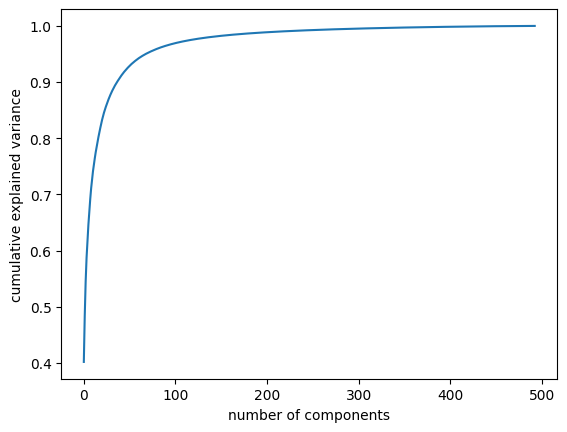

In [16]:
from sklearn.decomposition import PCA

#chosing the optimal number of components
pca = PCA(n_components=493).fit(Scaled_Data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


In [17]:
pca = PCA(n_components = 200)

pca.fit(Scaled_Data)
Reduced_Data = pca.transform(Scaled_Data)
Reduced_Data.shape

(493, 200)

In [18]:
#spliting the reduced data
Xpca_train, Xpca_test, ypca_train, ypca_test = train_test_split(Reduced_Data, Names, test_size=0.33, random_state=0, stratify=Names)

In [19]:
Xpca_train.shape

(330, 200)

In [20]:
#model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(Xpca_train,ypca_train)

#Predict Output for the test
predicted= knn.predict(Xpca_test)


In [21]:
print("\n Classification report of the model: \n",classification_report(ypca_test, predicted))


 Classification report of the model: 
               precision    recall  f1-score   support

         001       0.50      1.00      0.67         2
         002       1.00      1.00      1.00         1
         003       0.67      1.00      0.80         2
         004       0.50      1.00      0.67         2
         005       1.00      1.00      1.00         2
         006       1.00      1.00      1.00         1
         007       1.00      1.00      1.00         1
         008       1.00      1.00      1.00         1
         009       0.25      1.00      0.40         1
         010       1.00      1.00      1.00         1
         011       0.50      1.00      0.67         1
         012       0.00      0.00      0.00         1
         013       1.00      1.00      1.00         1
         014       0.00      0.00      0.00         1
         015       0.33      1.00      0.50         1
         016       1.00      1.00      1.00         1
         017       1.00      1.00      1.

C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Question 3: Creat a ANN for classify the original and the reduced Data

In [22]:
from tensorflow import keras
import tensorflow as tf

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense,Dropout
from sklearn.metrics import accuracy_score

from keras.optimizers import SGD

ModuleNotFoundError: No module named 'tensorflow.python.ops.gen_uniform_quant_ops'

In [23]:
#because the data is too large , so i'll convert images to GS inorder te reduce dimensionality
Data_gray=[]
for i in Data:
    Data_gray.append(cv2.cvtColor(i, cv2.COLOR_BGR2GRAY))
Data_gray = np.array(Data_gray)


In [24]:
Data_grayarr = []
for i in Data_gray:
    Data_grayarr.append(i.reshape(-1))
Data_grayarr = np.array(Data_grayarr)

In [25]:
X_graytrain, X_graytest, y_graytrain, y_graytest = train_test_split(Data_grayarr, Names, test_size=0.33, random_state=0, stratify=Names )  #to split the same time every run

In [26]:
X_graytrain = X_graytrain/255
X_graytest = X_graytest/255

In [27]:
y_train2 = keras.utils.to_categorical(y_graytrain) 
y_test2 = keras.utils.to_categorical(y_graytest)

In [28]:
y_train2.shape

(330, 126)

In [29]:
X_graytrain.shape[1]

9000

In [72]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=350, activation='sigmoid', input_dim=X_graytrain.shape[1]))
                     #200
model.add(Dense(units=400, activation='sigmoid'))
#model.add(Dropout(0.1)) 350
model.add(Dense(units=126, activation='softmax'))

#sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)

In [73]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [74]:
model.fit(X_graytrain, y_train2, epochs=250)

Epoch 1/250
11/11 [==============================] - 1s 23ms/step - loss: 5.2112 - accuracy: 0.0091
Epoch 2/250
11/11 [==============================] - 0s 23ms/step - loss: 4.8939 - accuracy: 0.0030
Epoch 3/250
11/11 [==============================] - 0s 23ms/step - loss: 4.8706 - accuracy: 0.0121
Epoch 4/250
11/11 [==============================] - 0s 23ms/step - loss: 4.8616 - accuracy: 0.0030
Epoch 5/250
11/11 [==============================] - 0s 23ms/step - loss: 4.8475 - accuracy: 0.0121
Epoch 6/250
11/11 [==============================] - 0s 23ms/step - loss: 4.8519 - accuracy: 0.0121
Epoch 7/250
11/11 [==============================] - 0s 23ms/step - loss: 4.8509 - accuracy: 0.0030
Epoch 8/250
11/11 [==============================] - 0s 22ms/step - loss: 4.8348 - accuracy: 0.0091
Epoch 9/250
11/11 [==============================] - 0s 24ms/step - loss: 4.8484 - accuracy: 0.0121
Epoch 10/250
11/11 [==============================] - 0s 24ms/step - loss: 4.8268 - accuracy: 0.0030

11/11 [==============================] - 0s 25ms/step - loss: 0.6986 - accuracy: 0.9273
Epoch 163/250
11/11 [==============================] - 0s 24ms/step - loss: 0.6705 - accuracy: 0.9242
Epoch 164/250
11/11 [==============================] - 0s 26ms/step - loss: 0.6560 - accuracy: 0.9515
Epoch 165/250
11/11 [==============================] - 0s 27ms/step - loss: 0.6715 - accuracy: 0.9394
Epoch 166/250
11/11 [==============================] - 0s 23ms/step - loss: 0.6722 - accuracy: 0.9394
Epoch 167/250
11/11 [==============================] - 0s 25ms/step - loss: 0.6432 - accuracy: 0.9485
Epoch 168/250
11/11 [==============================] - 0s 24ms/step - loss: 0.6380 - accuracy: 0.9212
Epoch 169/250
11/11 [==============================] - 0s 24ms/step - loss: 0.6136 - accuracy: 0.9394
Epoch 170/250
11/11 [==============================] - 0s 23ms/step - loss: 0.6173 - accuracy: 0.9606
Epoch 171/250
11/11 [==============================] - 0s 24ms/step - loss: 0.6217 - accuracy: 0

In [75]:
y_hat = model.predict(X_graytest)

6/6 [==============================] - 0s 9ms/step


In [76]:
model.evaluate(X_graytest, y_test2)

6/6 [==============================] - 0s 9ms/step - loss: 1.4444 - accuracy: 0.7239


[1.4444059133529663, 0.7239263653755188]

In [77]:
#ANN on reduced data
#Normlize the data
from sklearn.preprocessing import StandardScaler

Scaled_grayData = StandardScaler().fit_transform(Data_grayarr)

In [78]:
print(np.mean(Scaled_grayData),np.std(Scaled_grayData))

8.301675776832002e-18 1.0000000000000004


In [79]:
pca = PCA(n_components = 200)

pca.fit(Scaled_grayData)
Reduced_grayData = pca.transform(Scaled_grayData)

In [80]:
Xpcagray_train, Xpcagary_test, ypcagray_train, ypcagray_test = train_test_split(Reduced_grayData, Names, test_size=0.33, random_state=0, stratify=Names)

In [81]:
Xpcagray_train = Xpcagray_train/255
Xpcagary_test = Xpcagary_test/255

In [82]:
Xpcagray_train.shape[1]

200

In [83]:
tf.keras.backend.clear_session()
model2 = Sequential()
model2.add(Dense(units=345, activation='sigmoid', input_dim=Xpcagray_train.shape[1]))

model2.add(Dense(units=200, activation='sigmoid'))
#model2.add(Dropout(0.1))

model2.add(Dense(units=126, activation='softmax'))

In [84]:
#sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [85]:
model2.fit(Xpcagray_train, y_train2, epochs=250)

Epoch 1/250
11/11 [==============================] - 1s 5ms/step - loss: 5.0398 - accuracy: 0.0061
Epoch 2/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8605 - accuracy: 0.0121
Epoch 3/250
11/11 [==============================] - 0s 5ms/step - loss: 4.8355 - accuracy: 0.0121
Epoch 4/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8304 - accuracy: 0.0121
Epoch 5/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8311 - accuracy: 0.0030
Epoch 6/250
11/11 [==============================] - 0s 7ms/step - loss: 4.8232 - accuracy: 0.0121
Epoch 7/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8230 - accuracy: 0.0030
Epoch 8/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8207 - accuracy: 0.0091
Epoch 9/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8254 - accuracy: 0.0091
Epoch 10/250
11/11 [==============================] - 0s 6ms/step - loss: 4.8135 - accuracy: 0.0121
Epoch 11/

11/11 [==============================] - 0s 7ms/step - loss: 4.2855 - accuracy: 0.0758
Epoch 84/250
11/11 [==============================] - 0s 6ms/step - loss: 4.2673 - accuracy: 0.0727
Epoch 85/250
11/11 [==============================] - 0s 6ms/step - loss: 4.2357 - accuracy: 0.0818
Epoch 86/250
11/11 [==============================] - 0s 5ms/step - loss: 4.2176 - accuracy: 0.0970
Epoch 87/250
11/11 [==============================] - 0s 6ms/step - loss: 4.1878 - accuracy: 0.1242
Epoch 88/250
11/11 [==============================] - 0s 7ms/step - loss: 4.1654 - accuracy: 0.1030
Epoch 89/250
11/11 [==============================] - 0s 8ms/step - loss: 4.1438 - accuracy: 0.0970
Epoch 90/250
11/11 [==============================] - 0s 6ms/step - loss: 4.1202 - accuracy: 0.0939
Epoch 91/250
11/11 [==============================] - 0s 6ms/step - loss: 4.1020 - accuracy: 0.1121
Epoch 92/250
11/11 [==============================] - 0s 5ms/step - loss: 4.0761 - accuracy: 0.1364
Epoch 93/250


11/11 [==============================] - 0s 6ms/step - loss: 0.3185 - accuracy: 0.9970
Epoch 246/250
11/11 [==============================] - 0s 6ms/step - loss: 0.3124 - accuracy: 0.9970
Epoch 247/250
11/11 [==============================] - 0s 5ms/step - loss: 0.3062 - accuracy: 0.9970
Epoch 248/250
11/11 [==============================] - 0s 5ms/step - loss: 0.3013 - accuracy: 0.9970
Epoch 249/250
11/11 [==============================] - 0s 6ms/step - loss: 0.2960 - accuracy: 0.9970
Epoch 250/250
11/11 [==============================] - 0s 6ms/step - loss: 0.2896 - accuracy: 0.9970


In [86]:
y_hat = model2.predict(Xpcagary_test)

6/6 [==============================] - 0s 5ms/step


In [87]:
model2.evaluate(Xpcagary_test , y_test2)

6/6 [==============================] - 0s 5ms/step - loss: 0.9815 - accuracy: 0.8466


[0.9814864993095398, 0.8466257452964783]

4th question:

In [55]:
#BSIf
#import numpy as np
import matplotlib
import matplotlib.cm as cm
#import matplotlib.pyplot as plt
from PIL import Image
from scipy import signal

np.seterr(over='ignore', under='ignore')

def bsif(img, texturefilters_path, mode = ''):
    texturefilters = np.load(texturefilters_path)
    numScl = texturefilters.shape[2]
    codeImg = np.ones(img.shape)
    r = int(np.floor(texturefilters.shape[0] / 2))
    upimg = img[0:r, :]
    btimg = img[-r:, :]
    lfimg = img[:, 0: r]
    rtimg = img[:, -r:]
    cr11 = img[0:r, 0: r]
    cr12 = img[0:r, -r:]
    cr21 = img[-r:, 0: r]
    cr22 = img[-r:, -r:]
    imgWrap = np.zeros((img.shape[0] + 2*r, img.shape[1] + 2*r))
    imgWrap[:r, :r] = cr22; imgWrap[:r, r:img.shape[1] + r] = btimg; imgWrap[:r, img.shape[1] + r:img.shape[1] + 2*r] = cr21
    imgWrap[r:img.shape[0] + r, 0:r] = rtimg
    imgWrap[r:img.shape[0] + r, r:img.shape[1] + r] = img
    imgWrap[r:img.shape[0] + r, img.shape[1] + r:img.shape[1] + 2*r] = lfimg
    imgWrap[img.shape[0] + r:img.shape[0] + 2*r, :r] = cr12; imgWrap[img.shape[0] + r:img.shape[0] + 2*r, r:img.shape[1] + r] = upimg; imgWrap[img.shape[0] + r:img.shape[0] + 2*r, img.shape[1] + r:img.shape[1] + 2 * r] = cr11
    for i in range(0, numScl):
        tmp = texturefilters[:, :, numScl - (i + 1)]
        ci = signal.convolve2d(imgWrap, np.rot90(tmp, 2), mode='valid')
        ci = (ci > 0) * (2**i)
        codeImg = codeImg + ci
    if mode == 'h':
        bsifdescription = np.zeros((2**numScl))
        for i in range(0, (2**numScl)): bsifdescription[i] = (codeImg == (i + 1)).sum()
        return bsifdescription
    if mode == 'nh':
        bsifdescription = np.zeros(2 ** numScl)
        for i in range(0, 2 ** numScl): bsifdescription[i] = (codeImg == i).sum()
        bsifdescription = bsifdescription / np.max(bsifdescription)
        return bsifdescription
    else:
        return codeImg

def show_image(image):
    matplotlib.use('TkAgg')
    plt.figure()
    imgplot = plt.imshow(image, cmap='gray')
    plt.show()

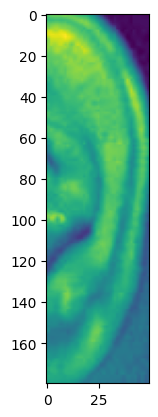

In [56]:
img = cv2.cvtColor(Data[0], cv2.COLOR_BGR2GRAY)

#show_image(img)
plt.imshow(img)

In [57]:
bsif_filter = 'C:/Users/badia/Downloads/bsif python/filters/ICAtextureFilters_15x15_12bit.npy'

In [61]:
img_bsif = bsif(img, bsif_filter,'h')
print('img bsif description shape: ', img_bsif.shape)

img bsif description shape:  (4096,)


In [62]:
# the gray data is Data_gray
imgs_bsif = []
for i in Data_gray:
    imgs_bsif.append(bsif(i, bsif_filter,'h'))
    
imgs_bsif = np.array(imgs_bsif)

In [63]:
imgs_bsif[0].shape

(4096,)

In [65]:
X_bsiftrain, X_bsiftest, y_bsiftrain, y_bsiftest = train_test_split(imgs_bsif, Names, test_size=0.33, random_state=0, stratify=Names )  #to split the same time every run

In [66]:
#model = KNeighborsClassifier(n_neighbors=3)

# Train the model using the training sets
knn.fit(X_bsiftrain,y_bsiftrain)

#Predict Output for the test
predicted= knn.predict(X_bsiftest)


In [67]:
print("\n Classification report of the model: \n",classification_report(y_bsiftest, predicted))



 Classification report of the model: 
               precision    recall  f1-score   support

         001       0.67      1.00      0.80         2
         002       1.00      1.00      1.00         1
         003       1.00      1.00      1.00         2
         004       0.67      1.00      0.80         2
         005       1.00      1.00      1.00         2
         006       0.00      0.00      0.00         1
         007       0.00      0.00      0.00         1
         008       1.00      1.00      1.00         1
         009       0.50      1.00      0.67         1
         010       1.00      1.00      1.00         1
         011       0.50      1.00      0.67         1
         012       1.00      1.00      1.00         1
         013       1.00      1.00      1.00         1
         014       1.00      1.00      1.00         1
         015       1.00      1.00      1.00         1
         016       1.00      1.00      1.00         1
         017       0.00      0.00      0.

C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
print(X_bsiftrain.shape,X_graytrain.shape)

(330, 4096) (330, 9000)


In [69]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=200, activation='sigmoid', input_dim=X_bsiftrain.shape[1]))

model.add(Dense(units=350, activation='sigmoid'))
#model.add(Dropout(0.1))
model.add(Dense(units=126, activation='softmax'))

#sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [70]:
model.fit(X_bsiftrain,y_train2, epochs=250)

Epoch 1/250
11/11 [==============================] - 1s 11ms/step - loss: 5.0131 - accuracy: 0.0061
Epoch 2/250
11/11 [==============================] - 0s 12ms/step - loss: 4.8078 - accuracy: 0.0212
Epoch 3/250
11/11 [==============================] - 0s 11ms/step - loss: 4.6982 - accuracy: 0.0485
Epoch 4/250
11/11 [==============================] - 0s 11ms/step - loss: 4.6141 - accuracy: 0.0909
Epoch 5/250
11/11 [==============================] - 0s 11ms/step - loss: 4.5312 - accuracy: 0.1121
Epoch 6/250
11/11 [==============================] - 0s 11ms/step - loss: 4.4402 - accuracy: 0.1909
Epoch 7/250
11/11 [==============================] - 0s 11ms/step - loss: 4.3619 - accuracy: 0.2485
Epoch 8/250
11/11 [==============================] - 0s 10ms/step - loss: 4.2927 - accuracy: 0.2909
Epoch 9/250
11/11 [==============================] - 0s 10ms/step - loss: 4.2182 - accuracy: 0.3758
Epoch 10/250
11/11 [==============================] - 0s 10ms/step - loss: 4.1479 - accuracy: 0.3939

11/11 [==============================] - 0s 11ms/step - loss: 0.0702 - accuracy: 1.0000
Epoch 163/250
11/11 [==============================] - 0s 10ms/step - loss: 0.0695 - accuracy: 1.0000
Epoch 164/250
11/11 [==============================] - 0s 10ms/step - loss: 0.0688 - accuracy: 1.0000
Epoch 165/250
11/11 [==============================] - 0s 10ms/step - loss: 0.0680 - accuracy: 1.0000
Epoch 166/250
11/11 [==============================] - 0s 10ms/step - loss: 0.0673 - accuracy: 1.0000
Epoch 167/250
11/11 [==============================] - 0s 10ms/step - loss: 0.0667 - accuracy: 1.0000
Epoch 168/250
11/11 [==============================] - 0s 11ms/step - loss: 0.0660 - accuracy: 1.0000
Epoch 169/250
11/11 [==============================] - 0s 11ms/step - loss: 0.0653 - accuracy: 1.0000
Epoch 170/250
11/11 [==============================] - 0s 12ms/step - loss: 0.0647 - accuracy: 1.0000
Epoch 171/250
11/11 [==============================] - 0s 11ms/step - loss: 0.0640 - accuracy: 1

In [71]:
y_hat = model.predict(X_bsiftrain)

11/11 [==============================] - 0s 4ms/step


In [72]:
model.evaluate(X_bsiftest , y_test2)

6/6 [==============================] - 0s 4ms/step - loss: 0.4730 - accuracy: 0.9509


[0.4729984998703003, 0.9509202241897583]

LBP for Classification

In [237]:
from skimage import feature

def lbp_features(img, radius=1, sampling_pixels=8):
    
    # LBP operates in single channel images so if RGB images are provided
    # we have to convert it to grayscale
    if (len(img.shape) > 2):
        img = img.astype(float)
        # RGB to grayscale convertion using Luminance
        img = img[:,:,0]*0.3 + img[:,:,1]*0.59 + img[:,:,2]*0.11

    # converting to uint8 type for 256 graylevels
    img = img.astype(np.uint8)
    
    # normalize values can also help improving description
    i_min = np.min(img)
    i_max = np.max(img)
    if (i_max - i_min != 0):
        img = (img - i_min)/(i_max-i_min)
    
    # compute LBP
    lbp = feature.local_binary_pattern(img, sampling_pixels, radius, method="uniform")
    
    # LBP returns a matrix with the codes, so we compute the histogram
    (hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, sampling_pixels + 3), range=(0, sampling_pixels + 2))

    # normalization
    hist = hist.astype("float")
    hist /= (hist.sum() + 1e-6)
    # return the histogram of Local Binary Patterns
    return hist
    

In [243]:
LBP_hist = []
for i in Data:
    LBP_hist.append(lbp_features(i))
    
LBP_hist = np.array(imgs_lbp)

In [245]:
LBP_hist_arr = []
for i in LBP_hist:
    LBP_hist_arr.append(i.reshape(-1))
LBP_hist_arr = np.array(LBP_hist_arr)

Text(0.5, 1.0, 'histogram of image 1')

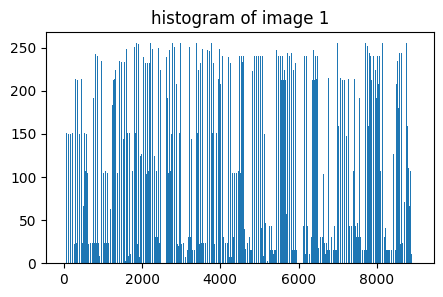

In [247]:
vals = range(len(LBP_hist_arr[0]))
plt.figure(figsize=(5,3))
plt.bar(vals,LBP_hist_arr[0])
plt.title('histogram of image 1')

In [248]:
X_lbptrain, X_lbptest, y_lbptrain, y_lbptest = train_test_split(LBP_hist_arr, Names, test_size=0.33, random_state=0, stratify=Names )  #to split the same time every run

In [249]:
# Train the model using the training sets
knn.fit(X_lbptrain,y_lbptrain)

#Predict Output for the test
predicted= knn.predict(X_lbptest)

In [250]:
print("\n Classification report of the model: \n",classification_report(y_lbptest, predicted))


 Classification report of the model: 
               precision    recall  f1-score   support

         001       0.50      1.00      0.67         2
         002       1.00      1.00      1.00         1
         003       1.00      1.00      1.00         2
         004       0.33      1.00      0.50         2
         005       1.00      1.00      1.00         2
         006       1.00      1.00      1.00         1
         007       0.00      0.00      0.00         1
         008       0.00      0.00      0.00         1
         009       0.33      1.00      0.50         1
         010       0.00      0.00      0.00         1
         011       0.00      0.00      0.00         1
         012       0.00      0.00      0.00         1
         013       1.00      1.00      1.00         1
         014       0.50      1.00      0.67         1
         015       1.00      1.00      1.00         1
         016       0.00      0.00      0.00         1
         017       0.00      0.00      0.

C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [272]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=350, activation='sigmoid', input_dim=X_lbptrain.shape[1]))
                      #200
model.add(Dense(units=250, activation='sigmoid'))

#model.add(Dropout(0.1))#350
model.add(Dense(units=126, activation='softmax'))

#sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [273]:
model.fit(X_lbptrain,y_train2, epochs=250)

Epoch 1/250
11/11 [==============================] - 1s 27ms/step - loss: 5.0914 - accuracy: 0.0061
Epoch 2/250
11/11 [==============================] - 0s 27ms/step - loss: 4.8662 - accuracy: 0.0091
Epoch 3/250
11/11 [==============================] - 0s 27ms/step - loss: 4.8451 - accuracy: 0.0121
Epoch 4/250
11/11 [==============================] - 0s 27ms/step - loss: 4.8405 - accuracy: 0.0061
Epoch 5/250
11/11 [==============================] - 0s 26ms/step - loss: 4.8409 - accuracy: 0.0030
Epoch 6/250
11/11 [==============================] - 0s 27ms/step - loss: 4.8368 - accuracy: 0.0030
Epoch 7/250
11/11 [==============================] - 0s 26ms/step - loss: 4.8351 - accuracy: 0.0061
Epoch 8/250
11/11 [==============================] - 0s 27ms/step - loss: 4.8366 - accuracy: 0.0091
Epoch 9/250
11/11 [==============================] - 0s 27ms/step - loss: 4.8307 - accuracy: 0.0091
Epoch 10/250
11/11 [==============================] - 0s 28ms/step - loss: 4.8276 - accuracy: 0.0091

11/11 [==============================] - 0s 26ms/step - loss: 4.7817 - accuracy: 0.0182
Epoch 163/250
11/11 [==============================] - 0s 26ms/step - loss: 4.7813 - accuracy: 0.0242
Epoch 164/250
11/11 [==============================] - 0s 26ms/step - loss: 4.7797 - accuracy: 0.0242
Epoch 165/250
11/11 [==============================] - 0s 25ms/step - loss: 4.7788 - accuracy: 0.0273
Epoch 166/250
11/11 [==============================] - 0s 26ms/step - loss: 4.7842 - accuracy: 0.0121
Epoch 167/250
11/11 [==============================] - 0s 28ms/step - loss: 4.7784 - accuracy: 0.0242
Epoch 168/250
11/11 [==============================] - 0s 27ms/step - loss: 4.7771 - accuracy: 0.0303
Epoch 169/250
11/11 [==============================] - 0s 26ms/step - loss: 4.7761 - accuracy: 0.0303
Epoch 170/250
11/11 [==============================] - 0s 25ms/step - loss: 4.7777 - accuracy: 0.0273
Epoch 171/250
11/11 [==============================] - 0s 27ms/step - loss: 4.7760 - accuracy: 0

In [274]:
y_hat = model.predict(X_lbptrain)

model.evaluate(X_lbptest, y_test2)

6/6 [==============================] - 0s 8ms/step - loss: 4.8291 - accuracy: 0.0123


[4.829104423522949, 0.012269938364624977]

In [91]:
def getLBPimage(image):
    '''
    == Input ==
    gray_image  : color image of shape (height, width)
    
    == Output ==  
    imgLBP : LBP converted image of the same shape as 
    '''
    
    ### Step 0: Step 0: Convert an image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    imgLBP = np.zeros_like(gray_image)
    neighboor = 3 
    for ih in range(0,image.shape[0] - neighboor):
        for iw in range(0,image.shape[1] - neighboor):
            ### Step 1: 3 by 3 pixel
            img          = gray_image[ih:ih+neighboor,iw:iw+neighboor]
            center       = img[1,1]
            img01        = (img >= center)*1.0
            img01_vector = img01.T.flatten()
            # it is ok to order counterclock manner
            # img01_vector = img01.flatten()
            ### Step 2: **Binary operation**:
            img01_vector = np.delete(img01_vector,4)
            ### Step 3: Decimal: Convert the binary operated values to a digit.
            where_img01_vector = np.where(img01_vector)[0]
            if len(where_img01_vector) >= 1:
                num = np.sum(2**where_img01_vector)
            else:
                num = 0
            imgLBP[ih+1,iw+1] = num
    return(imgLBP)

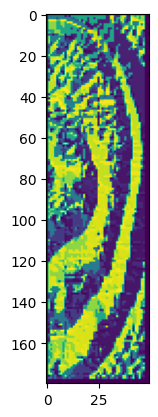

In [92]:
img = Data[0]
plt.imshow(getLBPimage(img))

In [133]:
imgs_lbp = []
for i in Data:
    imgs_lbp.append(getLBPimage(i))
    
imgs_lbp = np.array(imgs_lbp)

In [134]:
Data_lbparr = []
for i in imgs_lbp:
    Data_lbparr.append(i.reshape(-1))
    
Data_lbparr = np.array(Data_lbparr)

In [135]:
X_lbptrain, X_lbptest, y_lbptrain, y_lbptest = train_test_split(Data_lbparr, Names, test_size=0.33, random_state=0, stratify=Names )  #to split the same time every run

In [136]:
# Train the model using the training sets
knn.fit(X_lbptrain,y_lbptrain)

#Predict Output for the test
predicted= knn.predict(X_lbptest)

In [137]:
print("\n Classification report of the model: \n",classification_report(y_lbptest, predicted))


 Classification report of the model: 
               precision    recall  f1-score   support

         001       0.50      1.00      0.67         2
         002       1.00      1.00      1.00         1
         003       1.00      1.00      1.00         2
         004       0.33      1.00      0.50         2
         005       1.00      1.00      1.00         2
         006       1.00      1.00      1.00         1
         007       0.00      0.00      0.00         1
         008       0.00      0.00      0.00         1
         009       0.33      1.00      0.50         1
         010       0.00      0.00      0.00         1
         011       0.00      0.00      0.00         1
         012       0.00      0.00      0.00         1
         013       1.00      1.00      1.00         1
         014       0.50      1.00      0.67         1
         015       1.00      1.00      1.00         1
         016       0.00      0.00      0.00         1
         017       0.00      0.00      0.

C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\badia\anaconda3\envs\tfp3.8\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [227]:
tf.keras.backend.clear_session()

model = Sequential()
model.add(Dense(units=184, activation='sigmoid', input_dim=X_lbptrain.shape[1]))
                      #200
model.add(Dense(units=290, activation='sigmoid'))
#model.add(Dropout(0.1))#350

model.add(Dense(units=126, activation='softmax'))

#sgd = SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [228]:
model.fit(X_lbptrain,y_train2, epochs=200)

Epoch 1/200
11/11 [==============================] - 1s 19ms/step - loss: 5.1024 - accuracy: 0.0000e+00
Epoch 2/200
11/11 [==============================] - 0s 19ms/step - loss: 4.8851 - accuracy: 0.0061
Epoch 3/200
11/11 [==============================] - 0s 18ms/step - loss: 4.8503 - accuracy: 0.0091
Epoch 4/200
11/11 [==============================] - 0s 18ms/step - loss: 4.8522 - accuracy: 0.0121
Epoch 5/200
11/11 [==============================] - 0s 19ms/step - loss: 4.8462 - accuracy: 0.0061
Epoch 6/200
11/11 [==============================] - 0s 18ms/step - loss: 4.8415 - accuracy: 0.0152
Epoch 7/200
11/11 [==============================] - 0s 21ms/step - loss: 4.8475 - accuracy: 0.0121
Epoch 8/200
11/11 [==============================] - 0s 18ms/step - loss: 4.8466 - accuracy: 0.0091
Epoch 9/200
11/11 [==============================] - 0s 20ms/step - loss: 4.8366 - accuracy: 0.0061
Epoch 10/200
11/11 [==============================] - 0s 17ms/step - loss: 4.8357 - accuracy: 0.

11/11 [==============================] - 0s 17ms/step - loss: 4.8066 - accuracy: 0.0091
Epoch 83/200
11/11 [==============================] - 0s 21ms/step - loss: 4.8067 - accuracy: 0.0121
Epoch 84/200
11/11 [==============================] - 0s 18ms/step - loss: 4.8061 - accuracy: 0.0121
Epoch 85/200
11/11 [==============================] - 0s 19ms/step - loss: 4.8066 - accuracy: 0.0121
Epoch 86/200
11/11 [==============================] - 0s 18ms/step - loss: 4.8065 - accuracy: 0.0061
Epoch 87/200
11/11 [==============================] - 0s 24ms/step - loss: 4.8068 - accuracy: 0.0091
Epoch 88/200
11/11 [==============================] - 0s 16ms/step - loss: 4.8058 - accuracy: 0.0121
Epoch 89/200
11/11 [==============================] - 0s 17ms/step - loss: 4.8060 - accuracy: 0.0061
Epoch 90/200
11/11 [==============================] - 0s 22ms/step - loss: 4.8059 - accuracy: 0.0030
Epoch 91/200
11/11 [==============================] - 0s 17ms/step - loss: 4.8050 - accuracy: 0.0091
Epo

In [226]:
y_hat = model.predict(X_lbptrain)

model.evaluate(X_lbptest, y_test2)

6/6 [==============================] - 0s 7ms/step - loss: 4.8131 - accuracy: 0.0123


[4.813111782073975, 0.012269938364624977]

Question 5:

In [75]:
import seaborn as sns

In [76]:
pd.DataFrame(Data_grayarr)
#the number of images is 492

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,136,136,140,142,143,143,143,144,146,148,...,75,72,72,74,66,63,71,68,60,62
1,143,143,140,139,139,141,142,141,139,136,...,76,77,73,69,69,73,74,71,69,70
2,130,130,125,128,131,134,134,130,126,123,...,74,77,71,72,74,75,74,73,70,69
3,135,133,133,136,140,143,144,142,139,137,...,75,74,68,69,70,71,71,71,71,70
4,145,145,142,144,146,146,147,148,149,151,...,75,76,76,75,72,67,66,68,69,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
488,74,74,71,70,70,71,71,70,67,64,...,93,93,94,92,91,92,93,90,84,79
489,89,91,95,95,95,94,92,90,88,87,...,94,93,94,92,89,88,88,87,85,83
490,89,89,91,92,94,94,92,89,85,83,...,92,91,91,89,87,87,88,87,85,83
491,103,103,104,102,99,97,95,92,88,84,...,87,82,83,83,82,80,78,75,72,71


<AxesSubplot: xlabel='0', ylabel='Density'>

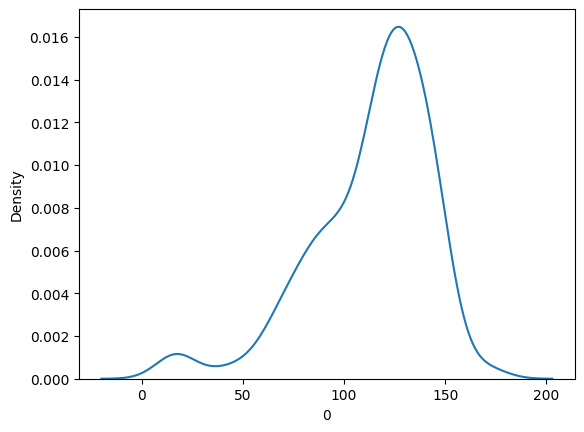

In [77]:
#kde of the 1st img
sns.kdeplot(data=Data_grayarr.T,x=0)                           #,fill=True)

<AxesSubplot: ylabel='Density'>

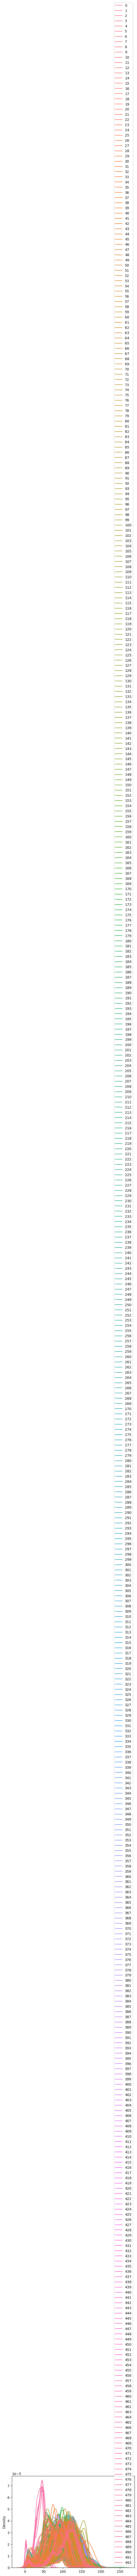

In [78]:
#KDE ploot for all the data
sns.kdeplot(data=Data_grayarr.T)

In [79]:
'''from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV
kde = KernelDensity(kernel='gaussian', bandwidth=0.2)
Data_kde = [] 
for i in range (Data_grayarr.shape[0]):
    Data_kde.append(kde.fit((Data_grayarr[i])[:,None]))
'''

"from sklearn.neighbors import KernelDensity\nfrom sklearn.model_selection import GridSearchCV\nkde = KernelDensity(kernel='gaussian', bandwidth=0.2)\nData_kde = [] \nfor i in range (Data_grayarr.shape[0]):\n    Data_kde.append(kde.fit((Data_grayarr[i])[:,None]))\n"